In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

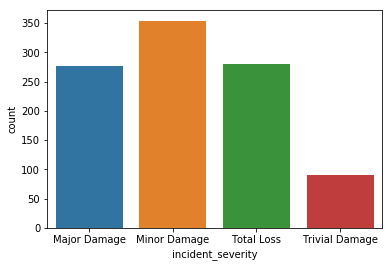

In [4]:
sns.countplot(x = 'incident_severity', data =df)

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df['policy_bind_year'] = pd.to_datetime(df['policy_bind_date'], format= '%d-%m-%Y').dt.year
df['policy_bind_month'] = pd.to_datetime(df['policy_bind_date'], format= '%d-%m-%Y').dt.month
df['policy_bind_day'] = pd.to_datetime(df['policy_bind_date'], format= '%d-%m-%Y').dt.day

df['fraud_reported']= df['fraud_reported'].map({'N':0,'Y':1}).astype(int)

df['incident_year']=pd.to_datetime(df['incident_date'], format= '%d-%m-%Y').dt.year
df['incident_month']=pd.to_datetime(df['incident_date'], format= '%d-%m-%Y').dt.month
df['incident_day']=pd.to_datetime(df['incident_date'], format= '%d-%m-%Y').dt.day

df['policy_bind_year']=pd.to_datetime(df['policy_bind_date'], format= '%d-%m-%Y').dt.year
df['policy_bind_month']=pd.to_datetime(df['policy_bind_date'], format= '%d-%m-%Y').dt.month
df['policy_bind_day']=pd.to_datetime(df['policy_bind_date'], format= '%d-%m-%Y').dt.day

df['policy_annual_premium']= df['policy_annual_premium'].astype(int)

In [7]:
df = df.drop(columns = ['policy_bind_date','_c39','incident_date','policy_bind_date'])

In [8]:
print(df['property_damage'].value_counts()) 
df['property_damage']=df['property_damage'].str.replace('?', 'Unavailable')

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


In [9]:
print(df['police_report_available'].value_counts())
df['police_report_available']=df['police_report_available'].str.replace('?', 'Unavailable')

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


In [10]:
df['collision_type'].value_counts()
df['collision_type']=df['collision_type'].str.replace('?', 'Unavailable')

In [11]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [12]:
df['auto_model'] = pd.factorize(df['auto_model'])[0]
df['auto_make'] = pd.factorize(df['auto_make'])[0]
df['property_damage']= pd.factorize(df['property_damage'])[0]
df['police_report_available']=pd.factorize(df['police_report_available'])[0]
df['collision_type']= pd.factorize(df['collision_type'])[0]
df['incident_severity']=pd.factorize(df['incident_severity'])[0]
df['authorities_contacted']= pd.factorize(df['authorities_contacted'])[0]
df['incident_state']=pd.factorize(df['incident_state'])[0]
df['incident_city']= pd.factorize(df['incident_city'])[0]
df['insured_sex']=pd.factorize(df['insured_sex'])[0]
df['insured_education_level']=pd.factorize(df['insured_education_level'])[0]
df['insured_occupation']= pd.factorize(df['insured_occupation'])[0]
df['incident_type']= pd.factorize(df['incident_type'])[0]
df['insured_relationship']=pd.factorize(df['insured_relationship'])[0]
df['policy_state']=pd.factorize(df['policy_state'])[0]
df['policy_csl']=pd.factorize(df['policy_csl'])[0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_state                   1000 non-null int64
policy_csl                     1000 non-null int64
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null int32
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null int64
insured_education_level        1000 non-null int64
insured_occupation             1000 non-null int64
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null int64
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null int64
collision_type            

In [14]:
X = df.drop(columns=['fraud_reported','incident_location','insured_hobbies'])
y = df['fraud_reported']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 40) (200, 40) (800,) (200,)


In [16]:
X_train.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
687,194,41,238196,2,0,500,1203,0,613119,0,...,61650,0,5,1999,1993,2,15,2015,2,6
500,1,29,357949,0,2,500,854,0,612826,1,...,55230,12,29,2003,2006,5,24,2015,1,1
332,85,25,159768,1,0,500,1259,0,439534,1,...,3760,5,37,2005,2008,9,3,2015,2,16
979,229,37,556270,1,2,1000,1331,0,433974,1,...,34720,0,5,2004,1995,2,21,2015,2,5
817,250,42,254837,1,1,500,1055,0,457962,0,...,54400,8,34,2009,2004,11,25,2015,1,3


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = log.predict(X_test)

In [20]:
log.score(X_test,y_test)

0.785

In [21]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier()
ran.fit(X_train,y_train)

C:\Users\avani\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_p = ran.predict(X_test)

ran.score(X_test,y_test)

0.74

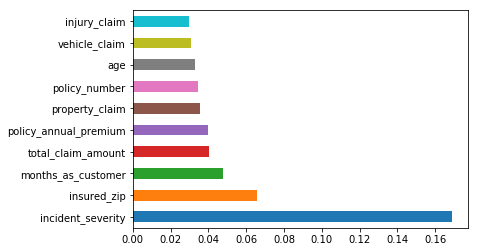

In [23]:
graph = pd.Series(ran.feature_importances_, index=X.columns)
graph = graph.nlargest(10)
graph.plot(kind='barh')